In [1]:
#dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_excel('Dataset.xlsx')

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


**dealing with missing data**

In [5]:
train_data.shape

(10683, 11)

In [6]:
train_data.isna().sum() #to check missing values in my data frame

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.dropna(inplace=True) #inplace= True, to modify my dataframe as well

In [8]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

**data cleaning**

In [10]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

1. *by changing the data types*

In [12]:
def change_into_datetime(col):
    train_data[col] =pd.to_datetime(train_data[col])

In [13]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(i)

C:\Users\Asus\AppData\Local\Temp\ipykernel_2068\2240060576.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_data[col] =pd.to_datetime(train_data[col])
C:\Users\Asus\AppData\Local\Temp\ipykernel_2068\2240060576.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data[col] =pd.to_datetime(train_data[col])
C:\Users\Asus\AppData\Local\Temp\ipykernel_2068\2240060576.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data[col] =pd.to_datetime(train_data[col])


In [14]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

2. *by making 'Date_of_Journey' column more understandable for my ml models*

In [16]:
train_data['Travel_year'] = train_data['Date_of_Journey'].dt.year
train_data['Travel_month'] = train_data['Date_of_Journey'].dt.month
train_data['Travel_day'] = train_data['Date_of_Journey'].dt.day

In [17]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Travel_year,Travel_month,Travel_day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-09-15 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-09-15 05:50:00,2024-09-15 13:15:00,7h 25m,2 stops,No info,7662,2019,5,1
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-09-15 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,2019,6,9
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-09-15 18:05:00,2024-09-15 23:30:00,5h 25m,1 stop,No info,6218,2019,5,12
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-09-15 16:50:00,2024-09-15 21:35:00,4h 45m,1 stop,No info,13302,2019,3,1


In [18]:
#dropping 'Date_of_Journey' column from by dataframe
train_data.drop('Date_of_Journey',axis=1,inplace=True)

In [19]:
train_data['Travel_year'].value_counts()

Travel_year
2019    10682
Name: count, dtype: int64

In [20]:
#so no need of 'Travel_year' colulmn as well
train_data.drop('Travel_year',axis=1,inplace=True)

In [21]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Travel_month,Travel_day
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-09-15 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-09-15 05:50:00,2024-09-15 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-09-15 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-09-15 18:05:00,2024-09-15 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-09-15 16:50:00,2024-09-15 21:35:00,4h 45m,1 stop,No info,13302,3,1


*extract hour & minuites from Dep_Time & Arrive_Time by calling function*

In [23]:
#creating function
def extract_hour(df,col):
    df[col+'_hour'] = df[col].dt.month

def extract_min(df,col):
    df[col+'_min'] = df[col].dt.minute

def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)
    

In [24]:
#calling those functions for Dep_Time column
extract_hour(train_data,'Dep_Time')
extract_min(train_data,'Dep_Time')
drop_column(train_data,'Dep_Time')

In [25]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Travel_month,Travel_day,Dep_Time_hour,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24,9,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-09-15 13:15:00,7h 25m,2 stops,No info,7662,5,1,9,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-09-15 23:30:00,5h 25m,1 stop,No info,6218,5,12,9,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-09-15 21:35:00,4h 45m,1 stop,No info,13302,3,1,9,50


In [26]:
#calling those functions for Arrival_Time column
extract_hour(train_data,'Arrival_Time')
extract_min(train_data,'Arrival_Time')
drop_column(train_data,'Arrival_Time')

In [27]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Travel_month,Travel_day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,9,20,3,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,9,50,9,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,6,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,9,5,9,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,9,50,9,35


*to make Duration column more ml model friendly*

In [29]:
'4h 45m'.split()

['4h', '45m']

In [30]:
#to keep a single format of Duration column : xh ym
duration = list(train_data['Duration'])
for i in range (len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = ' 0h' + duration[i]
        
            

In [31]:
train_data['Duration'] = duration

In [32]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Travel_month,Travel_day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,9,20,3,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,9,50,9,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,6,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,9,5,9,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,9,50,9,35


In [33]:
'4h 45m'.split(' ')[1] #output will be 45m

'45m'

In [34]:
'4h 45m'.split(' ')[1][0:-1] #output will be 45. & that's what we need

'45'

In [35]:
#to access the minute and hour of Duration 
def hour(x):
    return x.split(' ')[0][0:-1]

def mins(x):
    return x.split(' ')[1][0:-1]

In [36]:
train_data['Duration_Hour']=train_data['Duration'].apply(hour)
train_data['Duration_Minutes'] = train_data['Duration'].apply(mins)

In [37]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Travel_month,Travel_day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_Hour,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,9,20,3,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,9,50,9,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,6,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,9,5,9,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,9,50,9,35,4,45


In [38]:
train_data.drop('Duration',axis=1,inplace=True)

In [39]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Travel_month,Travel_day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_Hour,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,24,9,20,3,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,9,50,9,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,6,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,9,5,9,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,9,50,9,35,4,45


In [40]:
train_data.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
Travel_month          int32
Travel_day            int32
Dep_Time_hour         int32
Dep_Time_min          int32
Arrival_Time_hour     int32
Arrival_Time_min      int32
Duration_Hour        object
Duration_Minutes     object
dtype: object

In [41]:
#need to change Duration_Hour & Duration_Minutes's data type
train_data['Duration_Hour'] = train_data['Duration_Hour'].astype(int)
train_data['Duration_Minutes']=train_data['Duration_Minutes'].astype(int)

ValueError: invalid literal for int() with base 10: ''

In [92]:
print(train_data['Duration_Hour'].unique())
print(train_data['Duration_Minutes'].unique())
#due to minute's '0h5' value, i couldn't convert the data to int

['2' '7' '19' '5' '4' '15' '21' '25' '13' '12' '26' '22' '23' '20' '10'
 '6' '11' '8' '16' '3' '27' '1' '14' '9' '18' '17' '24' '30' '28' '29'
 '37' '34' '38' '35' '36' '47' '33' '32' '31' '42' '39' '' '41' '40']
['50' '25' '0' '45' '30' '5' '15' '35' '10' '20' '55' '40' '0h5']


In [93]:
# remove the '0h' prefix and keep just the numeric part
train_data['Duration_Minutes'] = train_data['Duration_Minutes'].replace(r'0h', '', regex=True)

In [94]:
# Replace any remaining empty strings or non-numeric values with '0'
train_data['Duration_Hour'] = train_data['Duration_Hour'].replace(r'^\s*$', '0', regex=True)
train_data['Duration_Minutes'] = train_data['Duration_Minutes'].replace(r'^\s*$', '0', regex=True)

# Now try converting to int again
train_data['Duration_Hour'] = train_data['Duration_Hour'].astype(int)
train_data['Duration_Minutes'] = train_data['Duration_Minutes'].astype(int)


In [95]:
print(train_data['Duration_Hour'].unique())
print(train_data['Duration_Minutes'].unique())
#no more '0h5'

[ 2  7 19  5  4 15 21 25 13 12 26 22 23 20 10  6 11  8 16  3 27  1 14  9
 18 17 24 30 28 29 37 34 38 35 36 47 33 32 31 42 39  0 41 40]
[50 25  0 45 30  5 15 35 10 20 55 40]


In [96]:
train_data.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
Travel_month          int32
Travel_day            int32
Dep_Time_hour         int32
Dep_Time_min          int32
Arrival_Time_hour     int32
Arrival_Time_min      int32
Duration_Hour         int32
Duration_Minutes      int32
dtype: object

**Handling Catagorical Data & Feature Encoding**
 - nominal data : onehot encoder
 

In [98]:
cat_col= train_data.select_dtypes(include=['object'])
cat_col


,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info
...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info


In [99]:
cont_col = train_data.select_dtypes(include= ['int32', 'int64'] )
cont_col.head()


,Price,Travel_month,Travel_day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_Hour,Duration_Minutes
0,3897,3,24,9,20,3,10,2,50
1,7662,5,1,9,50,9,15,7,25
2,13882,6,9,9,25,6,25,19,0
3,6218,5,12,9,5,9,30,5,25
4,13302,3,1,9,50,9,35,4,45


In [100]:
cat_col.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [101]:
cat_col.tail()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info
10682,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,2 stops,No info


In [102]:
# creating function to visualize the distribution of data for each category in a categorical variable
def cat_col_vs_price (col):
    plt.figure(figsize=(15,5))
    sns.boxplot(data=train_data.sort_values('Price',ascending=False),x=col,y='Price')

In [103]:
#creating function to apply one-hot encoder to nominal data
def dummy_df (col):
    return pd.get_dummies(data=cat_col[col]).astype(int)

In [104]:
cat_col.value_counts('Airline')

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

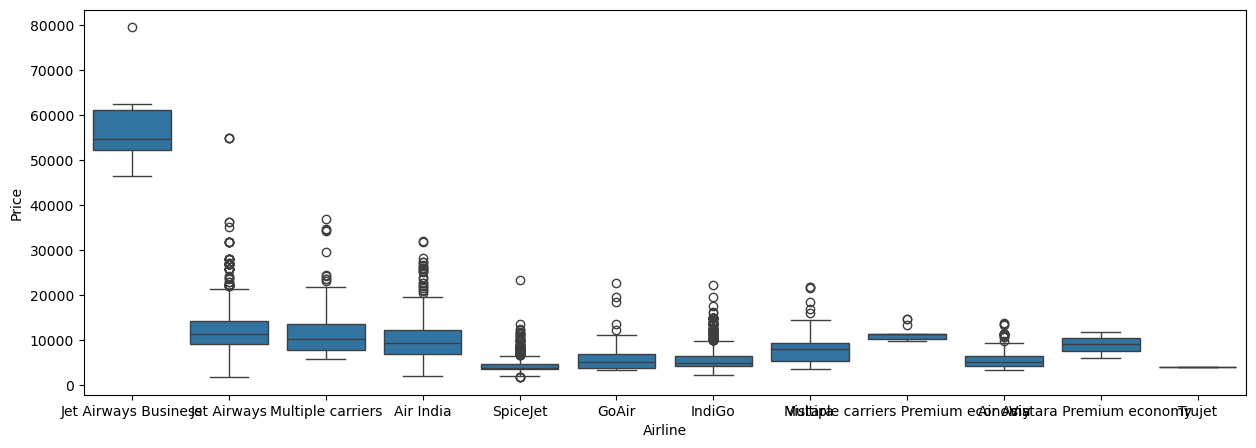

In [105]:
Airline_vs_price = cat_col_vs_price('Airline')

In [106]:
#applying one-hot encoder
Airline = dummy_df('Airline')
Airline.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [107]:
cat_col.value_counts('Source')

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

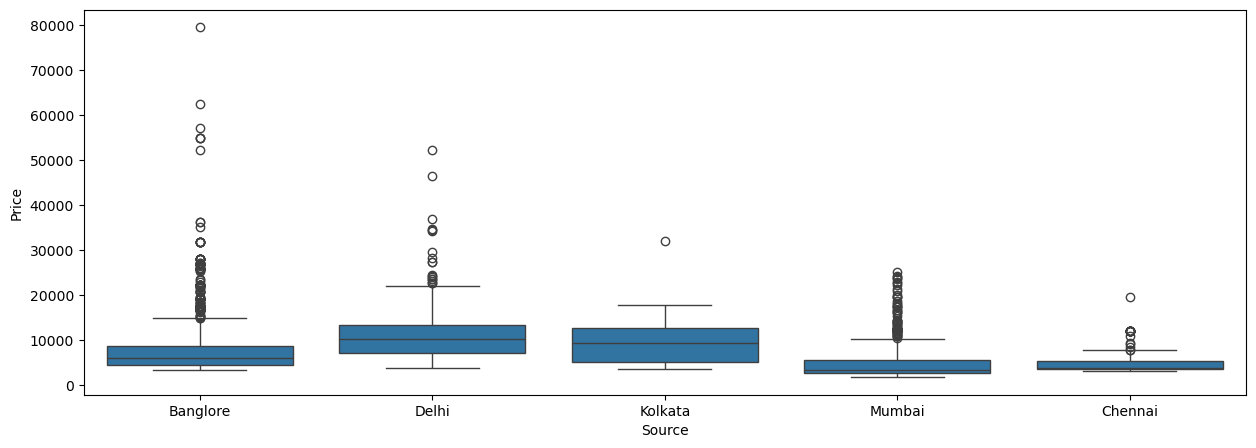

In [108]:
Source_vs_Price = cat_col_vs_price('Source')

In [109]:
#appying one-hot encoder
Source = dummy_df('Source')
Source.head()

,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [110]:
cat_col.value_counts('Destination')

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

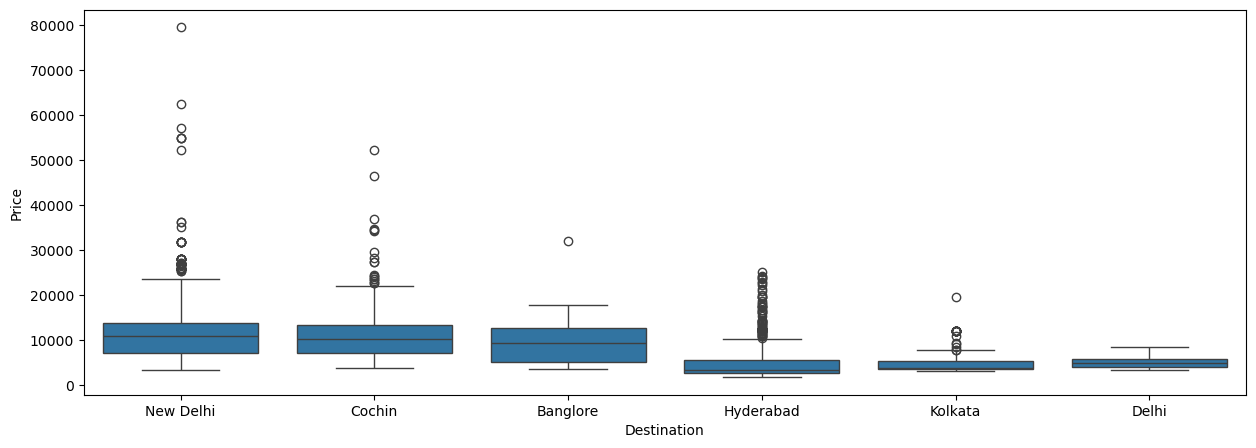

In [111]:
Destination_vs_Price = cat_col_vs_price('Destination')

In [112]:
#appying one-hot encoder
Destination = dummy_df('Destination')
Destination.head()

,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


**Deal with cat_col['Route']**

In [114]:
cat_col['Route_1'] = cat_col['Route'].str.split('→').str[0]
cat_col['Route_2'] = cat_col['Route'].str.split('→').str[1]
cat_col['Route_3'] = cat_col['Route'].str.split('→').str[2]
cat_col['Route_4'] = cat_col['Route'].str.split('→').str[3]
cat_col['Route_5'] = cat_col['Route'].str.split('→').str[4]

In [115]:
cat_col.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [116]:
drop_column(cat_col,'Route')

In [117]:
cat_col.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [118]:
cat_col.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [119]:
for i in ['Route_3','Route_4','Route_5'] :
    cat_col[i].fillna('None',inplace= True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_2068\900040292.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cat_col[i].fillna('None',inplace= True)


In [120]:
cat_col.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [121]:
for i in cat_col.columns:
    print('{} has total {} catagories'.format(i,len(cat_col[i].unique())))

Airline has total 12 catagories
Source has total 5 catagories
Destination has total 6 catagories
Total_Stops has total 5 catagories
Additional_Info has total 10 catagories
Route_1 has total 5 catagories
Route_2 has total 45 catagories
Route_3 has total 30 catagories
Route_4 has total 14 catagories
Route_5 has total 6 catagories


**Handling Catagorical Data & Feature Encoding**
 - ordinal data : label encoder
 - *will apply on Route_2, Route_3, Route_4 & Route_5 ;since these have way too many catagories to apply one-hot encoder*

In [123]:
from sklearn.preprocessing import LabelEncoder

In [124]:
for i in ['Route_1','Route_2', 'Route_3', 'Route_4', 'Route_5'] :
    cat_col[i]= LabelEncoder().fit_transform(cat_col[i])

**Deleting cat_col['Additional_Info']**

In [126]:
cat_col.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [127]:
cat_col['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [128]:
drop_column(cat_col,'Additional_Info')

In [129]:
cat_col.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5


**Dealing with cat_col['Total_Stops']**

In [131]:
cat_col.value_counts('Total_Stops')

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

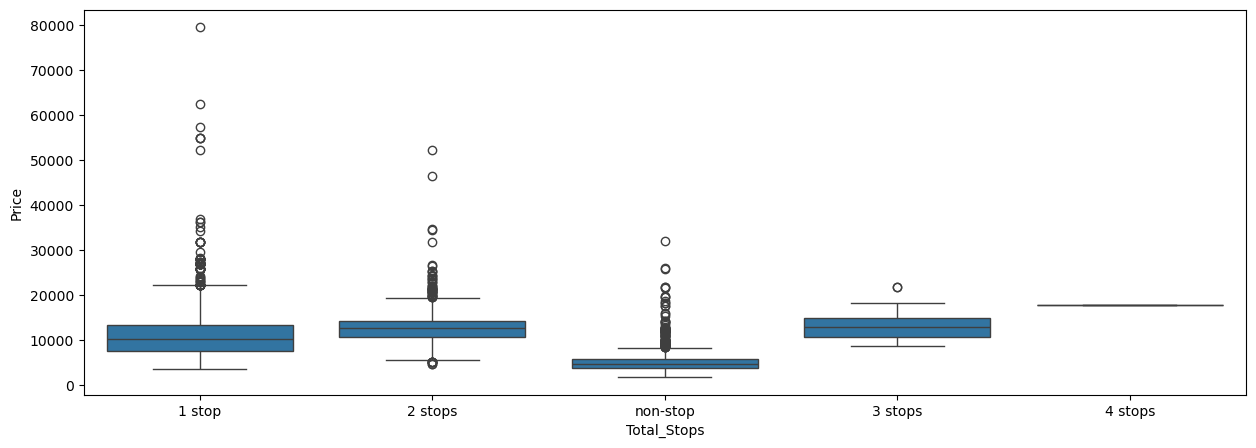

In [132]:
Total_Stops_vs_Price = cat_col_vs_price('Total_Stops')

In [133]:
#encoding by mapping dictionary
dict = {'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}
cat_col['Total_Stops']= cat_col['Total_Stops'].map(dict)

In [134]:
cat_col.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


**Concat all the catagorical encoded data to get the ultimate train_data**

In [136]:
train_data = pd.concat([Airline,Source,Destination,cat_col['Total_Stops'] ,cat_col['Route_1'] ,cat_col['Route_2'] ,cat_col['Route_3'] ,cat_col['Route_4'] ,cat_col['Route_5'] ,cont_col],axis=1)

In [137]:
train_data.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,...,Route_5,Price,Travel_month,Travel_day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_Hour,Duration_Minutes
0,0,0,0,1,0,0,0,0,0,0,...,5,3897,3,24,9,20,3,10,2,50
1,0,1,0,0,0,0,0,0,0,0,...,5,7662,5,1,9,50,9,15,7,25
2,0,0,0,0,1,0,0,0,0,0,...,5,13882,6,9,9,25,6,25,19,0
3,0,0,0,1,0,0,0,0,0,0,...,5,6218,5,12,9,5,9,30,5,25
4,0,0,0,1,0,0,0,0,0,0,...,5,13302,3,1,9,50,9,35,4,45


In [138]:
#to see all the 38 columns 
pd.set_option('display.max_columns',38)
train_data.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Price,Travel_month,Travel_day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_Hour,Duration_Minutes
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,13,29,13,5,3897,3,24,9,20,3,10,2,50
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,2,2,25,1,3,5,7662,5,1,9,50,9,15,7,25
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,3,32,4,5,5,13882,6,9,9,25,6,25,19,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,2,34,3,13,5,6218,5,12,9,5,9,30,5,25
4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,34,8,13,5,13302,3,1,9,50,9,35,4,45


**Detect Outliers if data has any**
- using distribution approach
- boxplot approach

In [140]:
def plot(df,col):
    #fig,(ax1,ax2)=plt.subplots(2,1) #this sets up a figure with two subplots (stacked vertically).
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5)) #this sets up a figure with two subplots (stacked horizontally).
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

C:\Users\Asus\AppData\Local\Temp\ipykernel_2068\3309738790.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax1)


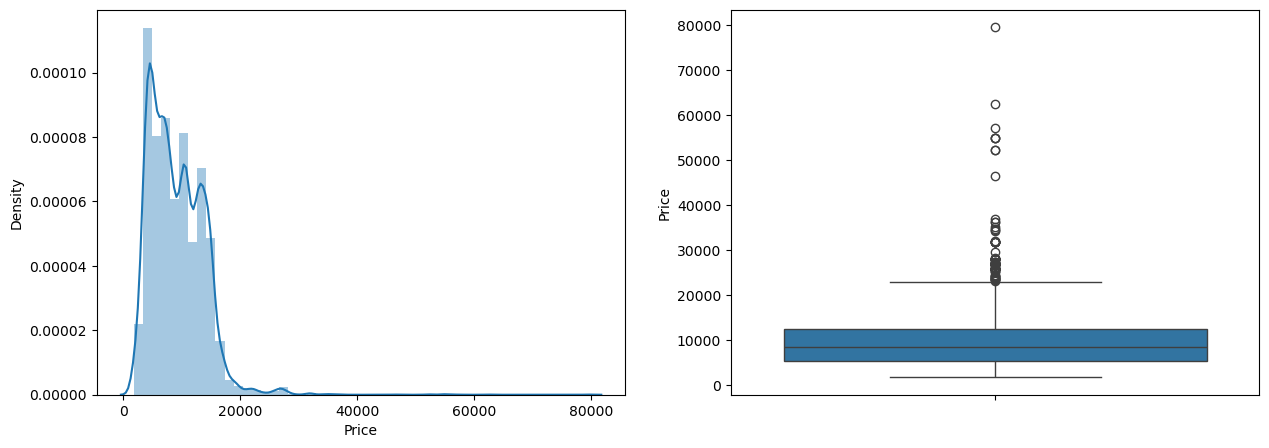

In [141]:
plot(train_data,'Price')

In [142]:
train_data['Price']= np.where(train_data['Price']>40000,train_data['Price'].median(),train_data['Price'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_2068\3309738790.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax1)


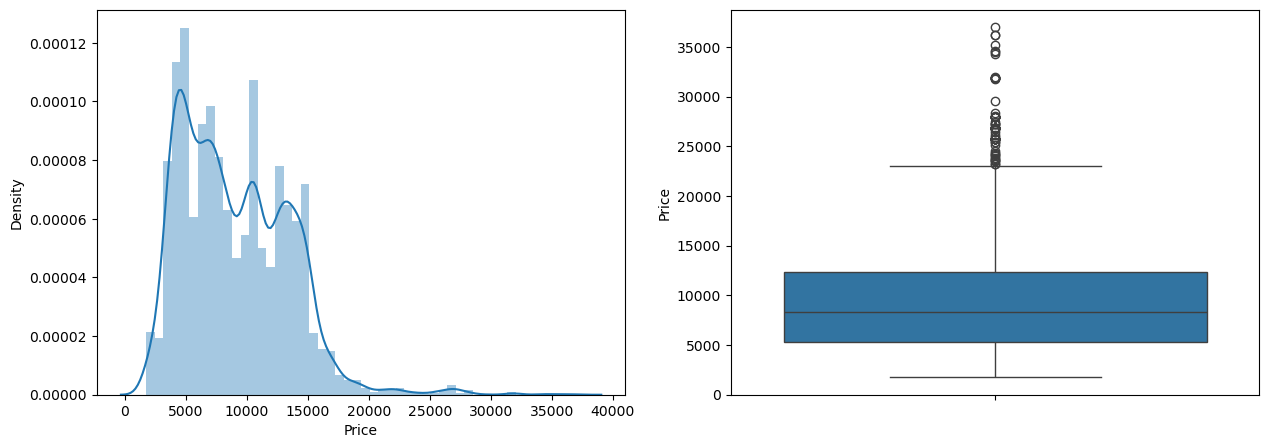

In [143]:
plot(train_data,'Price') #decreased the numbers of outlier 

**Separate out independent features & dependent features**

In [145]:
X = train_data.drop('Price',axis=1)
X.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Travel_month,Travel_day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_Hour,Duration_Minutes
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,13,29,13,5,3,24,9,20,3,10,2,50
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,2,2,25,1,3,5,5,1,9,50,9,15,7,25
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,3,32,4,5,5,6,9,9,25,6,25,19,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,2,34,3,13,5,5,12,9,5,9,30,5,25
4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,34,8,13,5,3,1,9,50,9,35,4,45


In [146]:
Y= train_data['Price']
Y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [147]:
X.shape

(10682, 37)

In [148]:
Y.shape

(10682,)

**Using feature selection techniques to select the important features**

In [150]:
from sklearn.feature_selection import mutual_info_classif

In [151]:
imp= pd.DataFrame(mutual_info_classif(X,Y),index=X.columns)
imp

,0
Air Asia,0.151275
Air India,0.681610
GoAir,0.082002
IndiGo,0.633442
Jet Airways,0.879385
Jet Airways Business,0.009225
Multiple carriers,0.501397
Multiple carriers Premium economy,0.014093
SpiceJet,0.317787
Trujet,0.000205


In [152]:
#to know about the dependency of the attributes with the target variable
imp.columns = ['Importance']
imp.sort_values(by=['Importance'],ascending=False)

,Importance
Route_2,3.007922
Route_3,2.527317
Route_1,2.320980
Total_Stops,1.888602
Duration_Hour,1.768255
Route_4,1.713281
Travel_month,1.651121
Arrival_Time_min,1.616844
Arrival_Time_hour,1.576529
Route_5,1.405679


In [153]:
#we can drop 'Vistara Premium economy' 
drop_column(X,'Vistara Premium economy')

In [154]:
X.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Travel_month,Travel_day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_Hour,Duration_Minutes
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,13,29,13,5,3,24,9,20,3,10,2,50
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,2,2,25,1,3,5,5,1,9,50,9,15,7,25
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,3,32,4,5,5,6,9,9,25,6,25,19,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,2,34,3,13,5,5,12,9,5,9,30,5,25
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,34,8,13,5,3,1,9,50,9,35,4,45


**Automate prediction function to apply ML models**

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

In [346]:
from sklearn import metrics
import pickle
def predict(m1_model,dump):
    model = m1_model.fit(X_train,Y_train)
    print('Training Score: {}'.format(model.score(X_train,Y_train)))
    prediction= model.predict(X_test)
    print('Predictions are {}'.format(prediction))
    print('\n')
    r2_score =  metrics.r2_score(Y_test,prediction)
    print('r2 score is {}'.format(r2_score))

    print('MAE :',metrics.mean_absolute_error(Y_test,prediction))
    print('MSE :',metrics.mean_squared_error(Y_test,prediction))
    print('RMSE :',np.sqrt(metrics.mean_absolute_error(Y_test,prediction)))

  # Plot the distribution of predictions versus actual values using kdeplot[karnel density plot]
    sns.kdeplot(prediction, label='Actual', fill=True)
    sns.kdeplot(Y_test, label='Predicted', fill=True)

  # adding title,labels and legend
    plt.title('Density plot: Actual vs Predicted')
    plt.xlabel('Price')
    plt.ylabel('Density')
    plt.legend()

    plt.show()

    if dump==1: 
        file = open('F:\Torrent Files\Project 1-- Predict Fare of Airlines Tickets using Machine Learning\git repo\Predict-Fare-of-Airlines-Tickets-/model.pkl','wb')
        pickle.dump(model,file)

<>:29: SyntaxWarning: invalid escape sequence '\T'
<>:29: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Asus\AppData\Local\Temp\ipykernel_2068\1969095962.py:29: SyntaxWarning: invalid escape sequence '\T'
  file = open('F:\Torrent Files\Project 1-- Predict Fare of Airlines Tickets using Machine Learning\git repo\Predict-Fare-of-Airlines-Tickets-/model.pkl','wb')


**Applying different ML algorithms on data using the 'Automate prediction function'**

Training Score: 0.9504338038946225
Predictions are [16886.9     5481.12    8916.32   ...  6981.78   12632.185  12995.3955]


r2 score is 0.8255196458960038
MAE : 1163.9228940965577
MSE : 3573317.7201710125
RMSE : 34.116314192722484


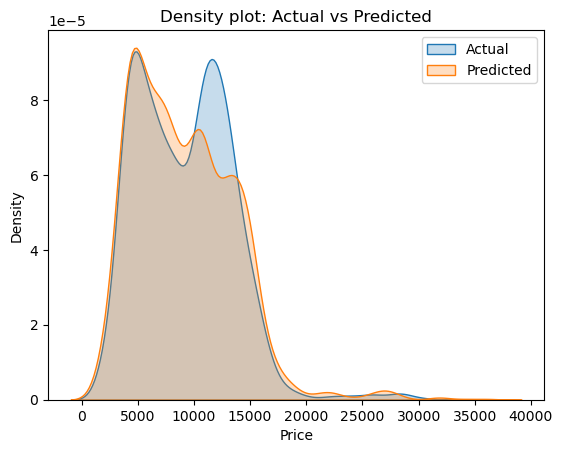

In [349]:
from sklearn.ensemble import RandomForestRegressor
predict(RandomForestRegressor(),1) #1, because this model gives the highest accuracy so far


Training Score: 0.6237984415225073
Predictions are [12760.52008493  7951.74659005  9679.14499515 ...  7257.57697493
 11431.84391992 11505.26990425]


r2 score is 0.6096724583797548
MAE : 1942.8110325649664
MSE : 7993818.721339158
RMSE : 44.07733014333974


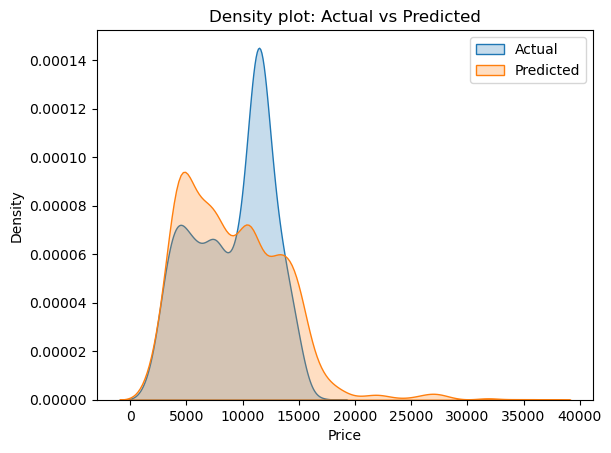

In [351]:
from sklearn.linear_model import LinearRegression
predict(LinearRegression(),0)

Training Score: 0.9646443644239345
Predictions are [16840.  4959.  9397. ...  6152. 13339. 14335.]


r2 score is 0.7524288028835963
MAE : 1303.2045234752768
MSE : 5070201.457367025
RMSE : 36.09992414777733


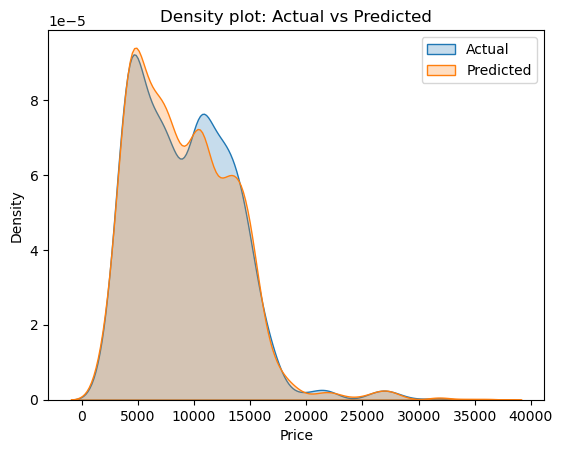

In [353]:
from sklearn.tree import DecisionTreeRegressor
predict(DecisionTreeRegressor(),0)

Training Score: 0.7764266651342547
Predictions are [16315.   5116.6  8536.  ...  6471.8 11082.8 11467.6]


r2 score is 0.649175749796492
MAE : 1737.763968179691
MSE : 7184800.3539167065
RMSE : 41.68649623294924


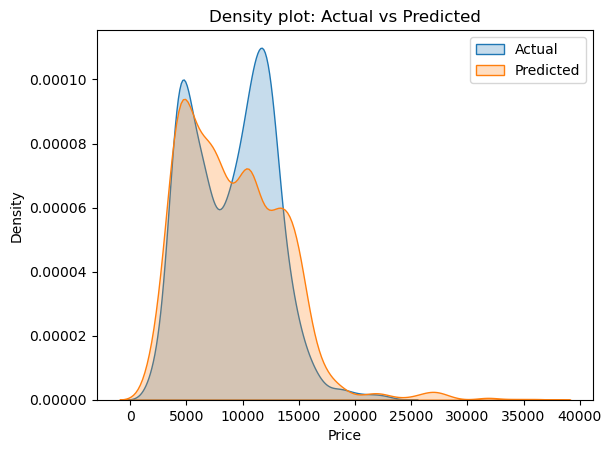

In [355]:
from sklearn.neighbors import KNeighborsRegressor
predict(KNeighborsRegressor(),0)

**Hypertuning my Best Model**

In [358]:
#which is after implementing RandomForestRegressor algorithm
#using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [360]:
n_estimators =  [int(x) for x in np.linspace(start=100,stop=1200,num=6) ]
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=4)]

In [362]:
random_grid = {
    'n_estimators': n_estimators,
    'max_features': ['auto','sqrt'],
    'max_depth': max_depth,
    'min_samples_split': [5,10,15,100], 
}

In [364]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [368]:
best_model =RandomizedSearchCV(estimator=RandomForestRegressor(),param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [370]:
best_model.fit(X_train,Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Asus\anaconda3\Lib\site-packages\sklea

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [372]:
best_model.best_params_

{'n_estimators': 320,
 'min_samples_split': 10,
 'max_features': 'sqrt',
 'max_depth': 13}

In [380]:
prediction = best_model.predict(X_test)

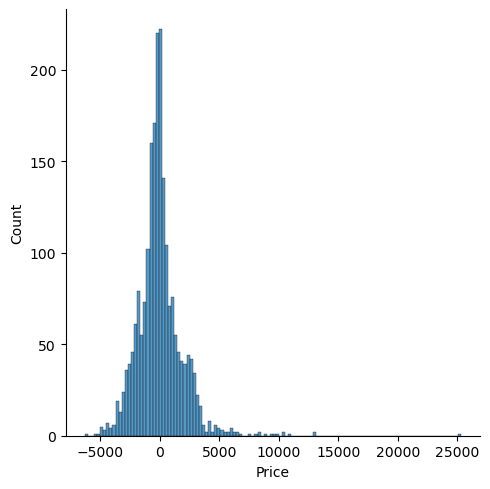

In [382]:
sns.displot(Y_test-prediction)

In [386]:
metrics.r2_score(Y_test,prediction) 

0.8196927038426108

In [390]:
file = open('F:\Torrent Files\Project 1-- Predict Fare of Airlines Tickets using Machine Learning\git repo\Predict-Fare-of-Airlines-Tickets-/best_model.pkl','wb')

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Asus\AppData\Local\Temp\ipykernel_2068\3704009521.py:1: SyntaxWarning: invalid escape sequence '\T'
  file = open('F:\Torrent Files\Project 1-- Predict Fare of Airlines Tickets using Machine Learning\git repo\Predict-Fare-of-Airlines-Tickets-/best_model.pkl','wb')


In [394]:
pickle.dump(best_model,file)

In [396]:
#if we need to load this best model , all we need to do is:
# best_model = open('F:\Torrent Files\Project 1-- Predict Fare of Airlines Tickets using Machine Learning\git repo\Predict-Fare-of-Airlines-Tickets-/best_model.pkl','rb')
# rf_tuned = pickle.load(best_model)